<a href="https://colab.research.google.com/github/PeanutSouth/AnalisisDeDatos-Tucci/blob/main/Ejercicio3_Analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    gender race_ethnicity parental_level_of_education         lunch  \
0        F              B           bachelor's degree      standard   
1        F              C                some college      standard   
2        F              B             master's degree      standard   
3        M              A          associate's degree  free/reduced   
4        M              C                some college      standard   
..     ...            ...                         ...           ...   
995      F              E             master's degree      standard   
996      M              C                 high school  free/reduced   
997      F              C                 high school  free/reduced   
998      F              D                some college      standard   
999      F              D                some college  free/reduced   

     test_preparation_course math_score reading_score writing_score  
0                      False         72            72            74  
1      

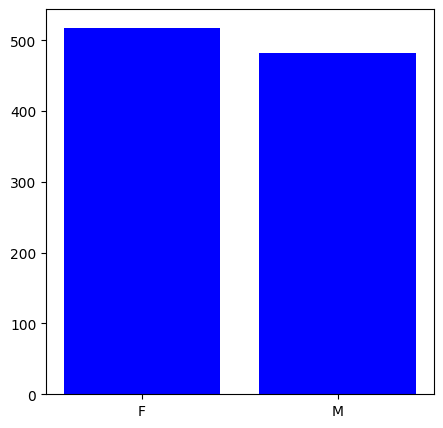

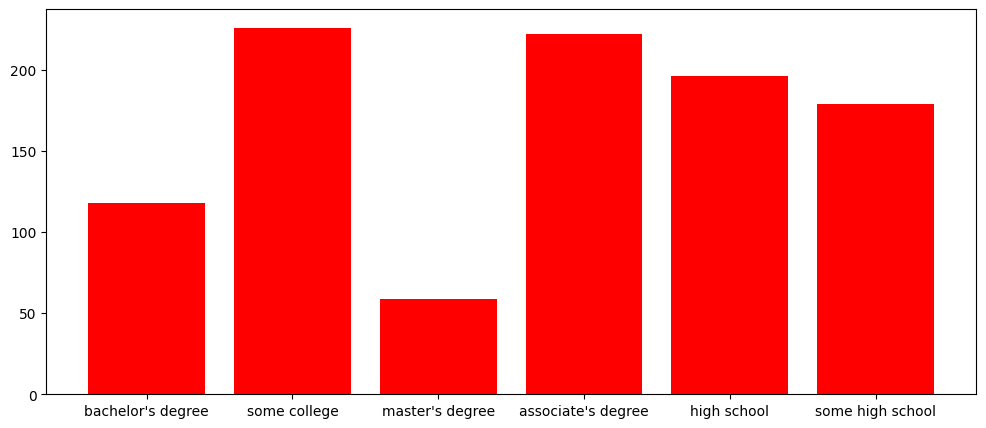

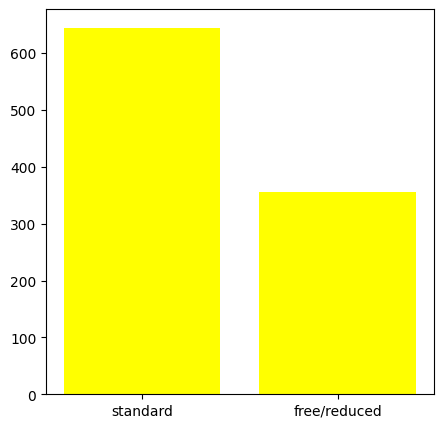

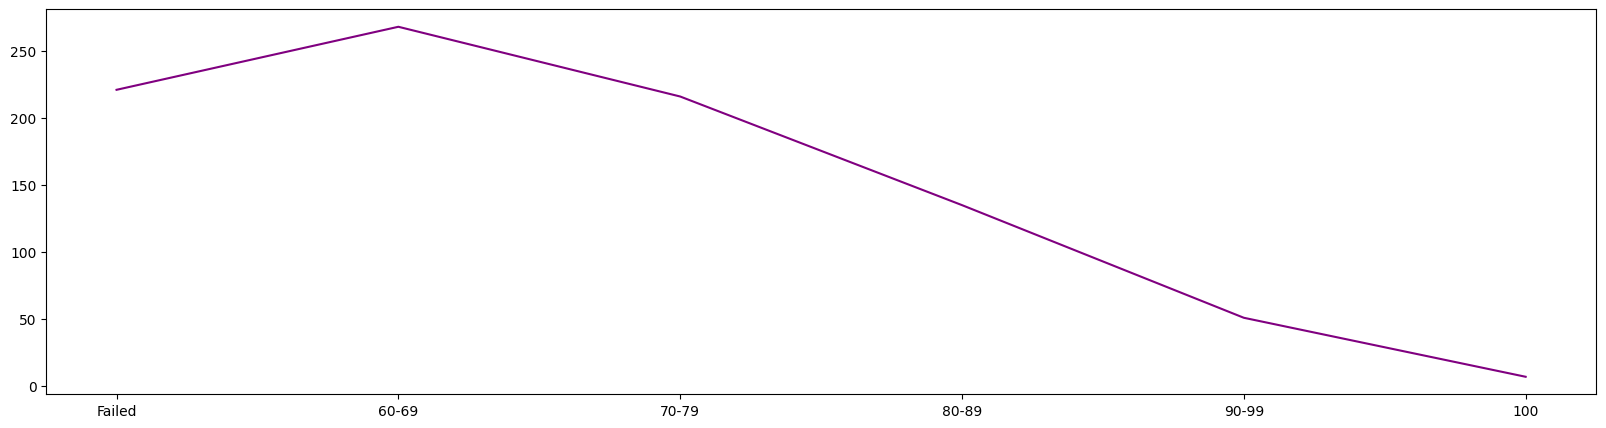

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt1
import matplotlib.pyplot as plt2
import matplotlib.pyplot as plt3
import matplotlib.pyplot as plt4


def arreglar_columnas(columnas):
  for i in range(len(columnas)):
      columnas[i] = columnas[i].replace(" ","")
  return columnas

def resolver_espacios(valor):
  valor = str(valor)
  if valor[0] == ' ':
        valor = valor[1:]
  if valor == '':
       valor = np.nan
  if valor == 'nan':
       valor = np.nan
  return valor

def clean_gender(valor):
    valor = str(valor)
    if valor.lower() == "female":
      valor = "F"
    elif valor.lower() == "male":
      valor = "M"
    elif valor.lower() != "F" or valor.lower() != "M":
      valor = None
    return valor
def clean_ethnicity(valor):
    valor = str(valor)
    if valor[len(valor)-1] == "A":
      valor = "A"
    elif valor[len(valor)-1] == "B":
      valor = "B"
    elif valor[len(valor)-1] == "C":
      valor = "C"
    elif valor[len(valor)-1] == "D":
      valor = "D"
    elif valor[len(valor)-1] == "E":
      valor = "E"
    else :
      valor = None
    return valor
def clean_test(valor):
    valor = str(valor)
    if valor.lower() == "completed":
      valor = True
    else :
      valor = False
    return valor
def desaprobar(valor):
    valor = int(valor)
    valorAux = redondear(valor)
    if valorAux < 60:
      valor = "Failed"
    return valor

def redondear(valor):
    return round(valor/10) * 10

def contar(valor):
    listaAux = valor.unique()
    mymap={}

    for value in listaAux:
      mymap[value] =  0

    for y in valor:
      for x in mymap:
        if y == x:
          mymap[x] += 1

    return mymap

def contarTest(valor):
    listaAux = ["Failed","60-69","70-79","80-89","90-99", "100"]
    mymap={}

    for value in listaAux:
      mymap[value] =  0

    for y in valor:
      if y == "Failed":
        mymap["Failed"] += 1
      else :
        y = int(y)
        if y >= 60 and y <= 69:
          mymap["60-69"] += 1
        elif y >= 70 and y <= 79:
          mymap["70-79"] += 1
        elif y >= 80 and y <= 89:
          mymap["80-89"] += 1
        elif y >= 90 and y <= 99:
          mymap["90-99"] += 1
        elif y == 100:
          mymap["100"] += 1

    return mymap



csv = pd.read_csv("study_performance.csv")
csvColumnas = list(csv.columns)

csv.columns = arreglar_columnas(csvColumnas)
csv = csv.applymap(resolver_espacios)



csv["gender"] = csv["gender"].apply(clean_gender)

csv["race_ethnicity"] = csv["race_ethnicity"].apply(clean_ethnicity)

csv["test_preparation_course"] = csv["test_preparation_course"].apply(clean_test)

csv['math_score'] = csv['math_score'].apply(desaprobar)
csv["reading_score"] = csv["reading_score"].apply(desaprobar)
csv["writing_score"] = csv["writing_score"].apply(desaprobar)

csv.to_csv("study_performance_clean.csv")
print(csv)

fig, ax = plt1.subplots(figsize = [5,5])
fig2, ax2 = plt2.subplots(figsize = [12,5])
fig2, ax3 = plt3.subplots(figsize = [5,5])
fig4, ax4 = plt4.subplots(figsize = [20,5])

lista1 = contar(csv["gender"])
lista2 = contar(csv["parental_level_of_education"])
lista3 = contar(csv["lunch"])
lista4 = contarTest(csv["math_score"])



ax.bar(lista1.keys(), lista1.values(), color = "blue", label="Grafico de Generos")

ax2.bar(lista2.keys(), lista2.values(), color = "red", label="Grafico de Educacion de Padres")


ax3.bar(lista3.keys(), lista3.values(), color = "yellow", label="Grafico Almuerzos")


ax4.plot(lista4.keys(), lista4.values(), color = "purple", label="Grafico Notas de Matematica")






# csv = csv.fillna("-")
#csv.dropna(inplace=True) # elimina las filas que contengan valores vacios
# csv.dropna(how="all") # elimina las filas si todos los valores son nulos


El csv se trata de una lista con el rendimiento de los estudiantes